In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('QueryResults.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   m           2272 non-null   object
 1   TagName     2272 non-null   object
 2   Unnamed: 2  2272 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 53.4+ KB


In [4]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


In [6]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [13]:
# Renaming columns
df.rename({'m':'Date', 'Unnamed: 2': 'PostsPerLang'}, axis='columns')

,Date,TagName,PostsPerLang
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2267,2022-03-01 00:00:00,php,4395
2268,2022-03-01 00:00:00,python,26273
2269,2022-03-01 00:00:00,r,5252
2270,2022-03-01 00:00:00,ruby,553


In [19]:
df = df.rename({'m':'Date', 'Unnamed: 2': 'PostsPerLang'}, axis='columns')

In [41]:
# Convert datetime in str to Timestamps
df.Date = pd.to_datetime(df.Date)
df

,Date,TagName,PostsPerLang
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164
...,...,...,...
2267,2022-03-01,php,4395
2268,2022-03-01,python,26273
2269,2022-03-01,r,5252
2270,2022-03-01,ruby,553


In [44]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
# Number of questions for each programming language since the beginning of stack overflow
df.groupby('TagName').sum()

,PostsPerLang
TagName,
assembly,39902
c,376643
c#,1529138
c++,758774
delphi,49402
go,60392
java,1834817
javascript,2352480
perl,66561


In [46]:
# Pivoting dataframe for simpler ploting
pivoted_df = df.pivot(index='Date', columns='TagName', values='PostsPerLang')

In [47]:
pivoted_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,310.0,2340.0,6392.0,4171.0,151.0,702.0,8280.0,15851.0,81.0,4131.0,23396.0,4624.0,449.0,1762.0
2021-12-01,287.0,2265.0,5726.0,3870.0,159.0,771.0,7547.0,15313.0,103.0,3745.0,22074.0,3925.0,436.0,1668.0
2022-01-01,240.0,2071.0,5933.0,3896.0,151.0,795.0,7739.0,16357.0,131.0,4039.0,22700.0,4266.0,477.0,1999.0


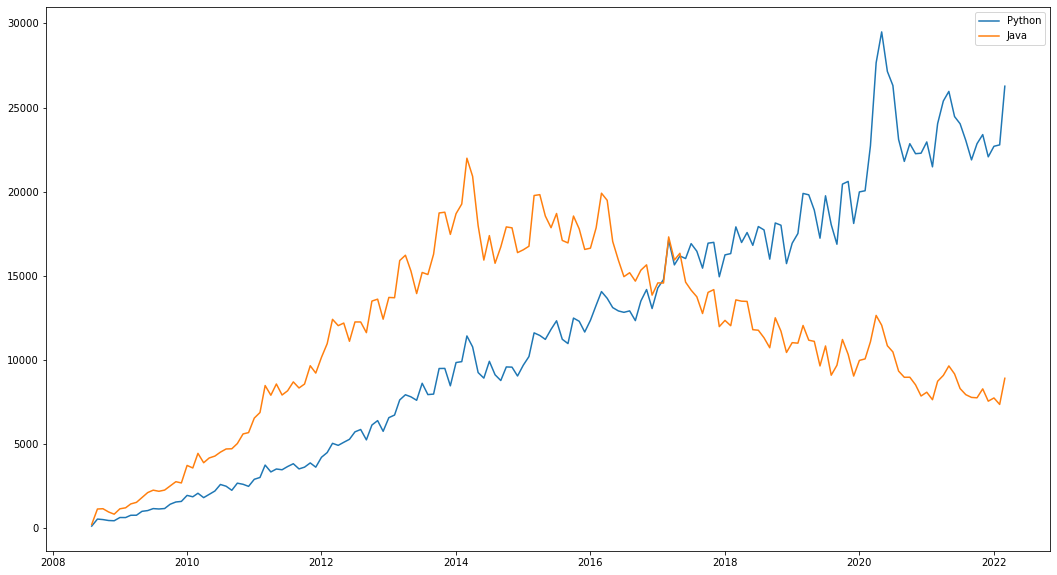

In [82]:
# Ploting popularity of Java and Python
plt.figure(figsize=(18,10))
plt.plot(pivoted_df.index, pivoted_df['python'], pivoted_df['java'])
plt.legend(('Python','Java'))


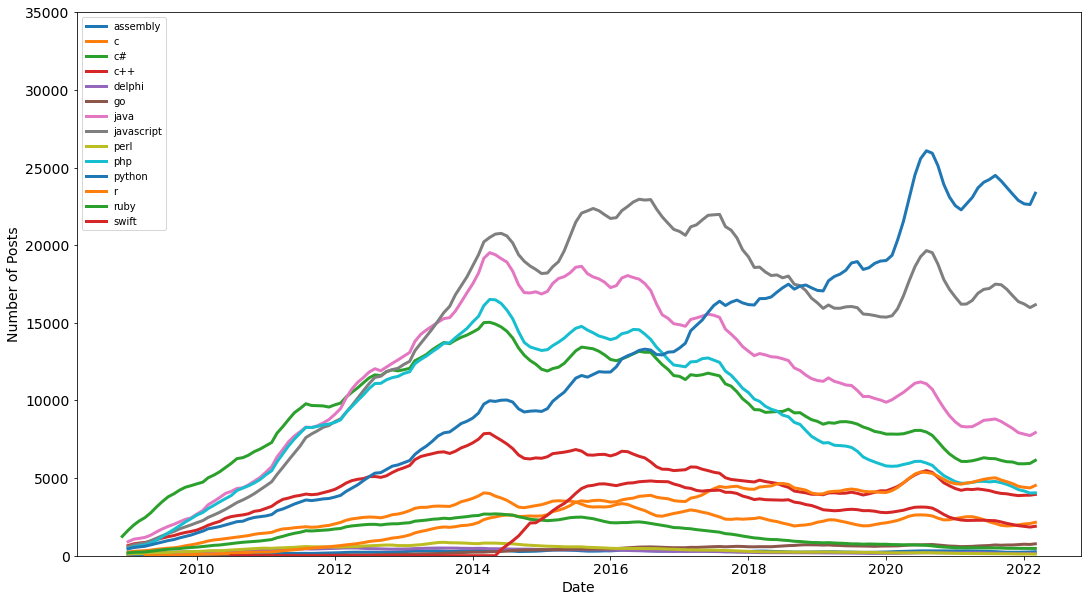

In [114]:
# Plot containing popularity of programming languages over years
roll_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(18,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(labels=(roll_df.columns))
plt.savefig('languages.jpg',dpi=500)

In [98]:
roll_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [105]:
import datetime

In [106]:
date_2012 = datetime.datetime(2012,1,1)

In [107]:
date_2012

datetime.datetime(2012, 1, 1, 0, 0)

In [116]:
# Looking for the most pupular programming language among 2008-2012 years
df[df['Date'] < date_2012].groupby('TagName').sum().idxmax()

PostsPerLang    c#
dtype: object

In [113]:
# Looking for the most popular programming language among 2015-2018 years
df[(df['Date'] < datetime.datetime(2018,1,1)) &\
   (df['Date'] > datetime.datetime(2015,1,1))].groupby('TagName').sum().idxmax()

PostsPerLang    javascript
dtype: object